In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

In [2]:
# сгенерируем набор данных

X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      bias=0, # intersept=0   
                                      coef=True, 
                                      random_state=42)

In [3]:
coef

array([40.71064891,  6.60098441])

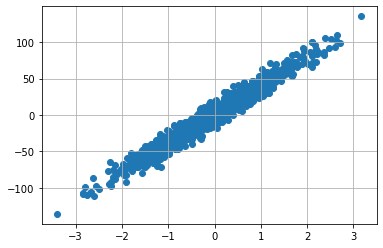

In [18]:
plt.scatter(X_[:, 0], y_);
plt.grid()

In [26]:
# веса по МНК
w = np.linalg.inv(X_.T @ X_) @ X_.T @ y_
w

array([39.30020801,  6.79671367])

Отмасштабируем получившиеся признаки методом стандартизации.

In [5]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X_, axis=0)
stds = np.std(X_, axis=0)
# параметр axis указывается для вычисления значений по столбцам
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X_.shape[0]):
    for j in range(X_.shape[1]):
        X_[i][j] = (X_[i][j] - means[j])/stds[j]

In [6]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Обучим линейную регрессию путем градиентного спуска и получим графики изменения весов и ошибки

In [7]:
def gradient_descent(X, Y, w):
    # список векторов весов после каждой итерации
    w_list = [w.copy()]

    # список значений ошибок после каждой итерации
    errors = []

    # шаг градиентного спуска
    eta = 0.01

    # максимальное число итераций
    max_iter = 1e4

    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist = 1e-8

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0

    # ход градиентного спуска
    pbar = tqdm(total = max_iter+1)
    while weight_dist > min_weight_dist and iter_num < max_iter:
        new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(X, new_w, Y))
        iter_num += 1
        w = new_w
        pbar.update(1)
    pbar.close()
    w_list = np.array(w_list)

    print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    
    return w_list, errors

In [8]:
# возьмем нулевые начальные веса
n_features = 2
w = np.zeros(n_features)
w_list = gradient_descent(X_, y_, w)

  9%|██████▋                                                                   | 901/10001.0 [00:00<00:07, 1179.54it/s]

В случае использования градиентного спуска функционал ошибки составляет 27.2642


In [14]:
def stochastic_gradient_descent(X, Y, w, eta = 0.01, max_iter = 1e5, min_weight_dist = 1e-8):
    # инициализируем начальный вектор весов
    w = np.zeros(2)

    # список векторов весов после каждой итерации
    w_list = [w.copy()]

    # список значений ошибок после каждой итерации
    errors = []

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0

    np.random.seed(1234)

    # ход градиентного спуска
    pbar = tqdm(total = max_iter+1)
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(X_.shape[0])

        new_w = w - 2 * eta * np.dot(X_[train_ind].T, (np.dot(X_[train_ind], w) - y_[train_ind])) / y_.shape[0]

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(X_, new_w, y_))

        iter_num += 1
        w = new_w
        pbar.update(1)
    pbar.close()
    w_list = np.array(w_list)

    print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    return w_list, errors

In [15]:
# возьмем нулевые начальные веса
n_features = 2
w = np.zeros(n_features)
w_list_stochastic = stochastic_gradient_descent(X_, y_, w, eta = 0.01, max_iter = 1e5, min_weight_dist = 1e-8)



  0%|                                                                                     | 0/100001.0 [00:00<?, ?it/s]

  0%|                                                                         | 169/100001.0 [00:00<00:59, 1675.52it/s]

  0%|▏                                                                        | 337/100001.0 [00:00<00:59, 1670.44it/s]

  1%|▎                                                                        | 505/100001.0 [00:00<01:03, 1558.96it/s]

  1%|▍                                                                        | 662/100001.0 [00:00<01:07, 1470.57it/s]

  1%|▌                                                                        | 824/100001.0 [00:00<01:05, 1519.90it/s]

  1%|▊                                                                       | 1064/100001.0 [00:00<00:55, 1772.08it/s]

  1%|▉                                                                       | 1315/100001.0 [00:00<00:50, 1947.96it/s]

  2%|█                        

 12%|████████▊                                                              | 12366/100001.0 [00:07<00:51, 1711.75it/s]

 13%|████████▉                                                              | 12539/100001.0 [00:07<00:52, 1666.22it/s]

 13%|█████████                                                              | 12837/100001.0 [00:07<00:44, 1960.89it/s]

 13%|█████████▎                                                             | 13105/100001.0 [00:07<00:41, 2098.61it/s]

 13%|█████████▌                                                             | 13401/100001.0 [00:07<00:38, 2242.96it/s]

 14%|█████████▋                                                             | 13682/100001.0 [00:07<00:36, 2341.93it/s]

 14%|█████████▉                                                             | 13924/100001.0 [00:07<00:36, 2363.48it/s]

 14%|██████████                                                             | 14211/100001.0 [00:07<00:35, 2449.01it/s]

 14%|██████████▎                

В случае использования стохастического градиентного спуска функционал ошибки составляет 843.8891


  0%|                                                                                     | 0/100001.0 [05:30<?, ?it/s]


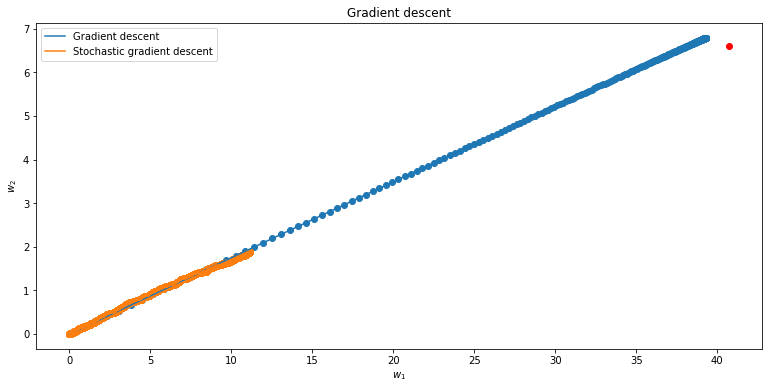

In [16]:
w_true = coef
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[0][:, 0], w_list[0][:, 1])
plt.scatter(w_list_stochastic[0][:, 0], w_list_stochastic[0][:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[0][:, 0], w_list[0][:, 1], label="Gradient descent")
plt.plot(w_list_stochastic[0][:, 0], w_list_stochastic[0][:, 1], label="Stochastic gradient descent")
plt.legend()
plt.show()

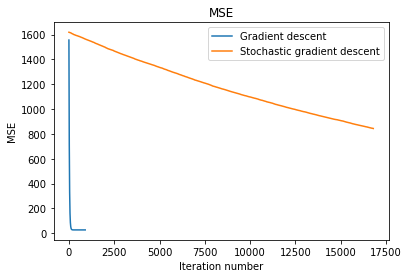

In [17]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(w_list[1])), w_list[1], label="Gradient descent")
plt.plot(range(len(w_list_stochastic[1])), w_list_stochastic[1], label="Stochastic gradient descent")
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

2_ Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).


In [22]:
def stochastic_gradient_descent_weighted(X, Y, w, eta = 0.01, max_iter = 1e5, min_weight_dist = 1e-8, lambda_=1e-8):
    # инициализируем начальный вектор весов
    w = np.zeros(2)

    # список векторов весов после каждой итерации
    w_list = [w.copy()]

    # список значений ошибок после каждой итерации
    errors = []

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0

    np.random.seed(1234)

    # ход градиентного спуска
    pbar = tqdm(total = max_iter+1)
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(X_.shape[0])

        new_w = w - 2 * eta * np.dot(X_[train_ind].T, (np.dot(X_[train_ind], w) - y_[train_ind])) / y_.shape[0] + lambda_ * w

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(X_, new_w, y_))

        iter_num += 1
        w = new_w
        pbar.update(1)
    pbar.close()
    w_list = np.array(w_list)

    print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    return w_list, errors

In [23]:
# возьмем нулевые начальные веса
n_features = 2
w = np.zeros(n_features)
w_list_stochastic_weighted = stochastic_gradient_descent_weighted(X_, y_, w, eta = 0.01, max_iter = 1e5, min_weight_dist = 1e-8, lambda_=1e-8)




  0%|                                                                                     | 0/100001.0 [00:00<?, ?it/s]


  0%|                                                                         | 119/100001.0 [00:00<01:27, 1142.43it/s]


  0%|▏                                                                        | 234/100001.0 [00:00<01:37, 1019.08it/s]


  1%|▎                                                                        | 508/100001.0 [00:00<00:58, 1697.72it/s]


  1%|▍                                                                        | 681/100001.0 [00:00<00:58, 1707.78it/s]


  1%|▌                                                                        | 854/100001.0 [00:00<01:04, 1535.68it/s]


  1%|▋                                                                       | 1038/100001.0 [00:00<01:03, 1557.56it/s]


  1%|▉                                                                       | 1229/100001.0 [00:00<00:59, 1658.69it/s]


  1%|█               

 13%|█████████                                                              | 12696/100001.0 [00:06<00:48, 1793.19it/s]


 13%|█████████▏                                                             | 12885/100001.0 [00:07<00:47, 1818.12it/s]


 13%|█████████▎                                                             | 13130/100001.0 [00:07<00:43, 1990.55it/s]


 13%|█████████▍                                                             | 13365/100001.0 [00:07<00:41, 2091.47it/s]


 14%|█████████▋                                                             | 13660/100001.0 [00:07<00:38, 2244.38it/s]


 14%|█████████▉                                                             | 13910/100001.0 [00:07<00:37, 2310.59it/s]


 14%|██████████                                                             | 14185/100001.0 [00:07<00:35, 2387.94it/s]


 14%|██████████▎                                                            | 14449/100001.0 [00:07<00:34, 2453.61it/s]


 15%|██████████▍        

 26%|██████████████████▊                                                    | 26495/100001.0 [00:13<00:40, 1811.92it/s]


 27%|██████████████████▉                                                    | 26678/100001.0 [00:13<00:43, 1703.32it/s]


 27%|███████████████████▏                                                   | 26963/100001.0 [00:13<00:37, 1956.48it/s]


 27%|███████████████████▎                                                   | 27212/100001.0 [00:13<00:34, 2083.60it/s]


 27%|███████████████████▍                                                   | 27429/100001.0 [00:14<00:34, 2106.65it/s]


 28%|███████████████████▋                                                   | 27642/100001.0 [00:14<00:34, 2087.26it/s]


 28%|███████████████████▊                                                   | 27852/100001.0 [00:14<00:36, 1962.86it/s]


 28%|███████████████████▉                                                   | 28052/100001.0 [00:14<00:36, 1971.91it/s]


 28%|███████████████████

 40%|████████████████████████████▏                                          | 39679/100001.0 [00:20<00:29, 2024.16it/s]


 40%|████████████████████████████▎                                          | 39883/100001.0 [00:20<00:29, 2010.65it/s]


 40%|████████████████████████████▍                                          | 40085/100001.0 [00:20<00:30, 1987.10it/s]


 40%|████████████████████████████▌                                          | 40302/100001.0 [00:20<00:29, 2021.31it/s]


 41%|████████████████████████████▊                                          | 40516/100001.0 [00:20<00:29, 2020.05it/s]


 41%|████████████████████████████▉                                          | 40719/100001.0 [00:20<00:29, 2019.46it/s]


 41%|█████████████████████████████                                          | 40923/100001.0 [00:21<00:29, 2025.13it/s]


 41%|█████████████████████████████▏                                         | 41136/100001.0 [00:21<00:28, 2055.67it/s]


 41%|███████████████████

 53%|█████████████████████████████████████▊                                 | 53344/100001.0 [00:27<00:22, 2076.35it/s]


 54%|██████████████████████████████████████                                 | 53561/100001.0 [00:27<00:22, 2089.48it/s]


 54%|██████████████████████████████████████▏                                | 53794/100001.0 [00:27<00:21, 2160.08it/s]


 54%|██████████████████████████████████████▍                                | 54057/100001.0 [00:27<00:20, 2296.95it/s]


 54%|██████████████████████████████████████▌                                | 54313/100001.0 [00:27<00:19, 2372.44it/s]


 55%|██████████████████████████████████████▋                                | 54564/100001.0 [00:27<00:18, 2410.88it/s]


 55%|██████████████████████████████████████▉                                | 54806/100001.0 [00:27<00:19, 2287.19it/s]


 55%|███████████████████████████████████████                                | 55037/100001.0 [00:27<00:20, 2247.53it/s]


 55%|███████████████████

 67%|███████████████████████████████████████████████▊                       | 67429/100001.0 [00:33<00:15, 2055.54it/s]


 68%|████████████████████████████████████████████████                       | 67635/100001.0 [00:34<00:16, 1966.34it/s]


 68%|████████████████████████████████████████████████▏                      | 67897/100001.0 [00:34<00:15, 2104.99it/s]


 68%|████████████████████████████████████████████████▍                      | 68174/100001.0 [00:34<00:14, 2248.13it/s]


 68%|████████████████████████████████████████████████▌                      | 68418/100001.0 [00:34<00:13, 2296.43it/s]


 69%|████████████████████████████████████████████████▋                      | 68649/100001.0 [00:34<00:13, 2270.43it/s]


 69%|████████████████████████████████████████████████▉                      | 68877/100001.0 [00:34<00:14, 2195.94it/s]


 69%|█████████████████████████████████████████████████                      | 69098/100001.0 [00:34<00:14, 2196.16it/s]


 69%|███████████████████

 82%|██████████████████████████████████████████████████████████▎            | 82110/100001.0 [00:40<00:10, 1775.22it/s]


 82%|██████████████████████████████████████████████████████████▍            | 82292/100001.0 [00:40<00:10, 1751.85it/s]


 82%|██████████████████████████████████████████████████████████▌            | 82483/100001.0 [00:40<00:09, 1791.22it/s]


 83%|██████████████████████████████████████████████████████████▊            | 82751/100001.0 [00:40<00:08, 2034.31it/s]


 83%|██████████████████████████████████████████████████████████▉            | 83041/100001.0 [00:41<00:07, 2186.87it/s]


 83%|███████████████████████████████████████████████████████████▏           | 83307/100001.0 [00:41<00:07, 2313.25it/s]


 84%|███████████████████████████████████████████████████████████▎           | 83541/100001.0 [00:41<00:08, 1940.56it/s]


 84%|███████████████████████████████████████████████████████████▍           | 83747/100001.0 [00:41<00:08, 1970.47it/s]


 84%|███████████████████

 97%|████████████████████████████████████████████████████████████████████▉  | 97067/100001.0 [00:47<00:01, 2235.72it/s]


 97%|█████████████████████████████████████████████████████████████████████  | 97292/100001.0 [00:47<00:01, 2184.59it/s]


 98%|█████████████████████████████████████████████████████████████████████▏ | 97534/100001.0 [00:47<00:01, 2202.10it/s]


 98%|█████████████████████████████████████████████████████████████████████▍ | 97840/100001.0 [00:47<00:00, 2342.54it/s]


 98%|█████████████████████████████████████████████████████████████████████▋ | 98074/100001.0 [00:47<00:00, 2323.84it/s]


 98%|█████████████████████████████████████████████████████████████████████▊ | 98350/100001.0 [00:47<00:00, 2391.79it/s]


 99%|█████████████████████████████████████████████████████████████████████▉ | 98589/100001.0 [00:47<00:00, 2342.68it/s]


 99%|██████████████████████████████████████████████████████████████████████▏| 98858/100001.0 [00:48<00:00, 2341.44it/s]


 99%|███████████████████

В случае использования стохастического градиентного спуска функционал ошибки составляет 55.9787


  0%|                                                                                     | 0/100001.0 [03:36<?, ?it/s]


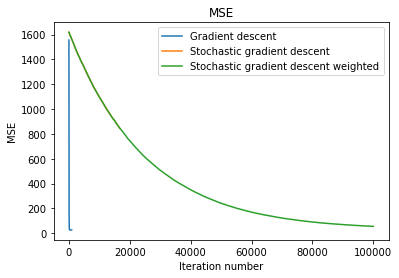

In [24]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(w_list[1])), w_list[1], label="Gradient descent")
plt.plot(range(len(w_list_stochastic[1])), w_list_stochastic[1], label="Stochastic gradient descent")
plt.plot(range(len(w_list_stochastic_weighted[1])), w_list_stochastic_weighted[1], label="Stochastic gradient descent weighted")
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()